## **Understanding And Preparing Dataset**


### **Importing Libraries**

This cell loads the Python libraries needed for audio processing, data handling, and deep learning model development. Key imports include:

* **librosa** and **librosa.display**: Used for audio analysis and visualization, such as plotting waveforms and spectrograms.
* **matplotlib.pyplot** and **seaborn**: For creating various plots and graphs, such as the distribution of emotion classes.
* **numpy** and **pandas**: For numerical computations and working with data in tabular (DataFrame) format.
* **IPython.display.Audio**: Enables playback of audio clips directly within the notebook.
* **keras** (from TensorFlow): Used for building and training deep learning models, including layers and model structures.
* **keras.utils.np\_utils**: Provides utility functions such as one-hot encoding of labels.
* **sklearn.model\_selection.train\_test\_split**: Splits the dataset into training, validation, and test sets.
* **sklearn.preprocessing.LabelEncoder**: Converts categorical emotion labels into numerical form.
* **sklearn.preprocessing.StandardScaler**: Normalizes feature data for improved model performance.
* **EarlyStopping** and **ReduceLROnPlateau** (Keras callbacks): Help control training by stopping early if validation loss stops improving and reducing the learning rate when the model plateaus.




In [1]:
import os 
os.listdir('/kaggle/input/')

['Savee', 'Crema', 'Ravdess', 'Tess']

In [2]:
import os
import re

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
from keras import layers
from keras import models
# from keras.utils import np_utils, to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import itertools

2025-05-17 16:27:39.021201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747499259.204582      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747499259.254277      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



### **Defining Dataset Paths**

In this step, we define the file paths for the four speech-emotion recognition datasets used in the project. Each variable points to a specific directory that contains audio files for a particular dataset:

* **Ravdess**: Path to the **RAVDESS** dataset.
* **Crema**: Path to the **CREMA-D** dataset.
* **Savee**: Path to the **SAVEE** dataset.
* **Tess**: Path to the **TESS** dataset.


In [3]:
# # Paths to
# Ravdess = "../input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24"
# Crema = "../input/speech-emotion-recognition-en/Crema"
# Savee = "../input/speech-emotion-recognition-en/Savee"
# Tess = "../input/speech-emotion-recognition-en/Tess"


# Paths to
Ravdess = "../input/Ravdess/audio_speech_actors_01-24"
Crema = "../input/Crema"
Savee = "../input/Savee"
Tess = "../input/Tess"

### **Data preparation**

This section loads metadata (file paths and emotion labels) from each dataset into pandas DataFrames. We collect the emotion label (as a number or code) and the file path for each audio file.

### **Ravdess dataset**

Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)


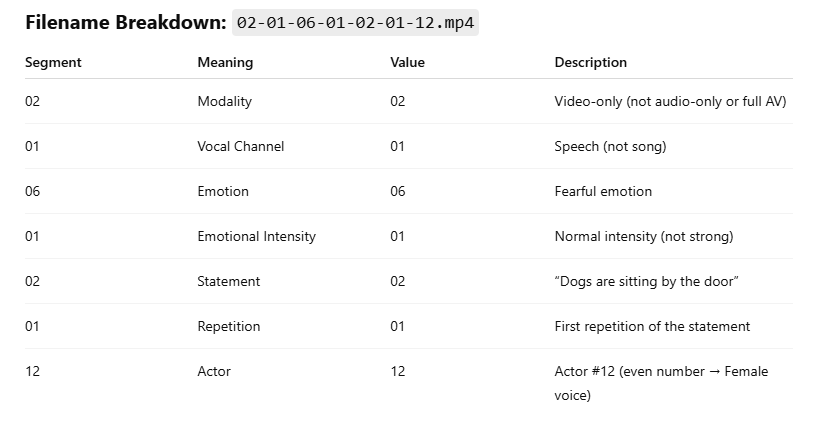

The RAVDESS dataset encodes emotion and other metadata in the filenames. This code iterates through the actor subfolders, parses each filename, and extracts the emotion code:

os.listdir(Ravdess) lists the actor directories (e.g., Actor_01, Actor_02, ...).

For each directory, we list WAV files and split the filename by - to get the components.

The third element info[2] is the emotion code (an integer 1-8 according to RAVDESS convention).

We append a tuple (emotion, full_path) to emotion_df.

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, os.path.join(Ravdess, dir, wav)))

Next, we convert the list of tuples into a pandas DataFrame and rename columns:
The first column (index 0) is the emotion code, second column (index 1) is the file path.
We rename 0 to "Emotion" and 1 to "Path" for clarity.

In [5]:
Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Finally, we map the numeric emotion codes to string labels. RAVDESS uses codes 1-8 (e.g., 1 = neutral, 3 = happy, etc.), so we replace them with human-readable labels. The code also maps code 2 (calm) to "neutral" in this replacement (treating calm as neutral here).

In [6]:
Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

/tmp/ipykernel_35/4248491501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


Emotion                                               Path
0  surprise  ../input/Ravdess/audio_speech_actors_01-24/Act...
1   neutral  ../input/Ravdess/audio_speech_actors_01-24/Act...
2   disgust  ../input/Ravdess/audio_speech_actors_01-24/Act...
3   disgust  ../input/Ravdess/audio_speech_actors_01-24/Act...
4   neutral  ../input/Ravdess/audio_speech_actors_01-24/Act...

### **Crema dataset**

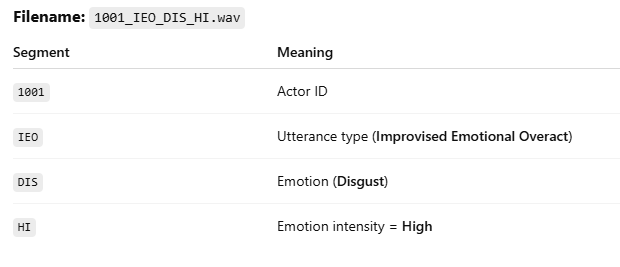

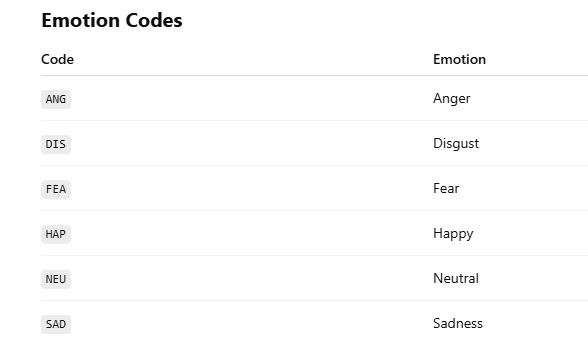

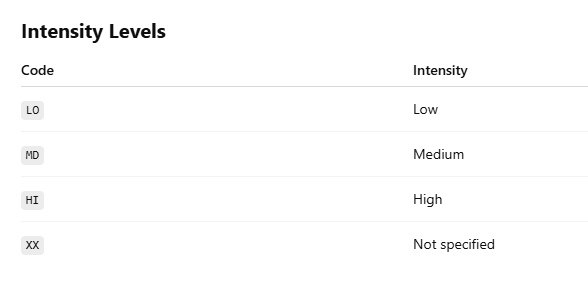

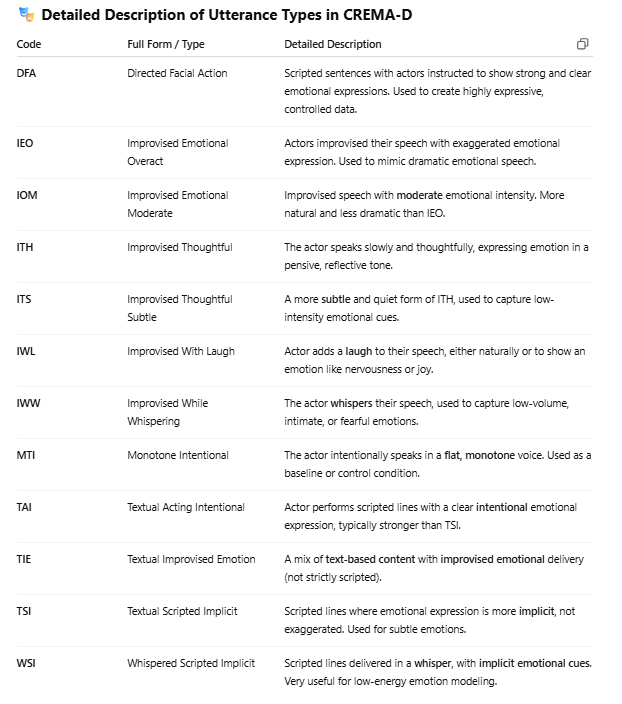
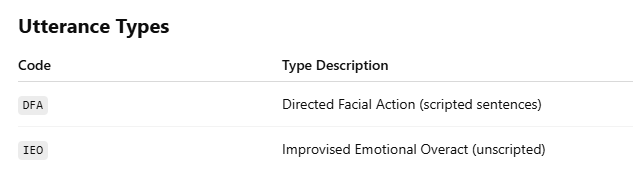

For CREMA, filenames have an underscore-delimited format where the emotion appears as a 3-letter code (SAD, ANG, HAP, DIS, FEA, NEU, or xxx for uninterpreted). We:

List all WAV files in the CREMA directory.

Split each filename by _ to get components, the third part (info[2]) is the emotion code.

Use a series of if statements to map these codes to emotion labels ("sad", "angry", etc.).

If an audio file does not match known codes, label it "unknown" (though CREMA files should match one of the known codes).

After building the list, we create a DataFrame as before and rename columns.

In [7]:
emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + "/" + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + "/" + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + "/" + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + "/" + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + "/" + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + "/" + wav))
    else:
        emotion_df.append(("unknown", Crema + "/" + wav))


Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Crema_df.head()

Emotion                                Path
0  disgust  ../input/Crema/1028_TSI_DIS_XX.wav
1    happy  ../input/Crema/1075_IEO_HAP_LO.wav
2    happy  ../input/Crema/1084_ITS_HAP_XX.wav
3  disgust  ../input/Crema/1067_IWW_DIS_XX.wav
4  disgust  ../input/Crema/1066_TIE_DIS_XX.wav

### **TESS dataset**

TESS contains recordings of two female actors.

Each actor speaks the same set of neutral phrases with seven different emotions.

The recordings are organized into folders by emotion category and speaker ID.


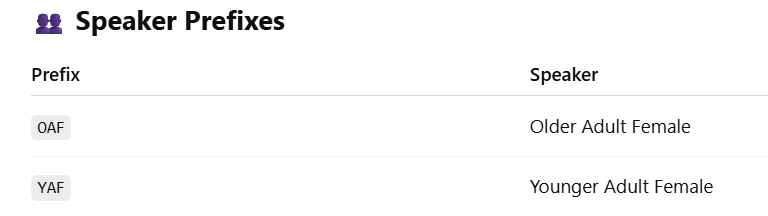

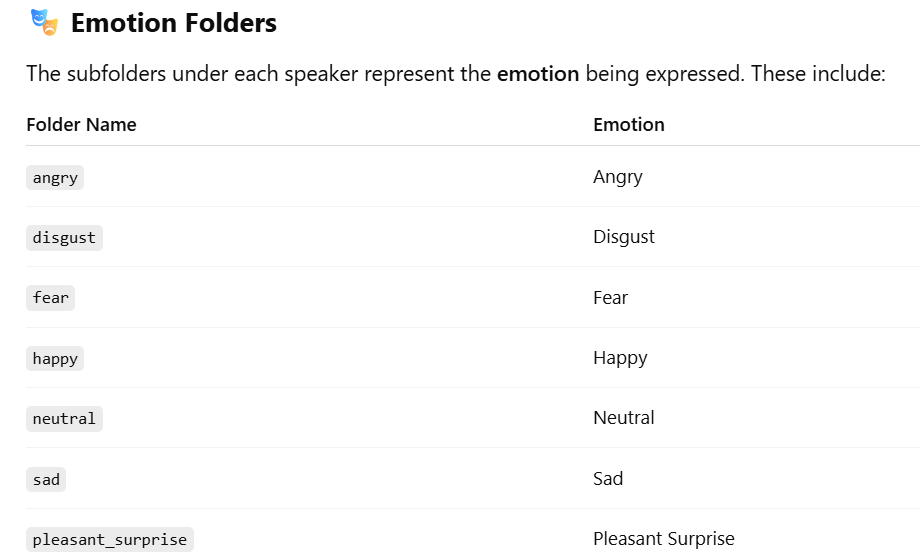

The TESS dataset folders contain audio files named like OAF_happy_ps.wav where ps stands for “puzzled” 
(often interpreted as surprise) and other two-letter emotion codes (an angry, sd sadness, etc.). This code:

Lists subdirectories in the TESS folder (e.g., male/female speaker codes).

Iterates through files in each directory.

Splits filenames by _ and takes the third element info[2] as the two-letter emotion code.

If the code is "ps", we map it to "surprise", otherwise use the code as the label.

In [8]:
tess_directory_list = os.listdir(Tess)

emotion_df = []

for dir in tess_directory_list:
    for wav in os.listdir(os.path.join(Tess, dir)):
        info = wav.partition(".wav")[0].split("_")
        emo = info[2]
        if emo == "ps":
            emotion_df.append(("surprise", os.path.join(Tess, dir, wav)))
        else:
            emotion_df.append((emo, os.path.join(Tess, dir, wav)))


Tess_df = pd.DataFrame.from_dict(emotion_df)
Tess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Tess_df.head()

Emotion                                        Path
0    fear    ../input/Tess/YAF_fear/YAF_home_fear.wav
1    fear   ../input/Tess/YAF_fear/YAF_youth_fear.wav
2    fear    ../input/Tess/YAF_fear/YAF_near_fear.wav
3    fear  ../input/Tess/YAF_fear/YAF_search_fear.wav
4    fear    ../input/Tess/YAF_fear/YAF_pick_fear.wav

### **Savee dataset**

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'su' = 'surprise'

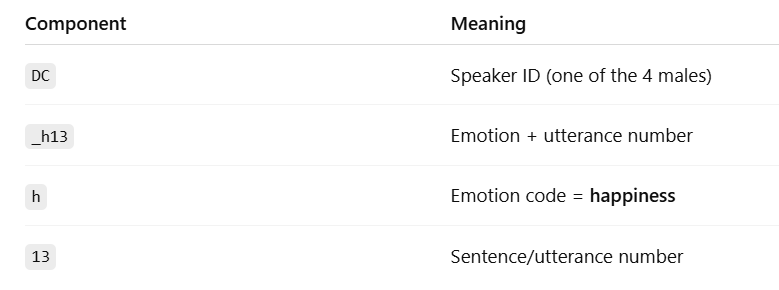

In SAVEE, filenames start with one or two letters indicating emotion ('a'=anger, 'd'=disgust, 'f'=fear, 'h'=happy, 'n'=neutral, 'sa'=sadness, 'su'=surprise). We:

List all files in the SAVEE directory.

For each filename, split on "_" and take the second part (split("_")[1]) which begins with the emotion letter(s).

Use a regular expression re.split(r"[0-9]", info) to strip off any trailing digits, leaving just the letters.

Map the letter(s) to full emotion names via if statements.

Append (emotion, path) to emotion_df.

Create and rename the DataFrame as before.

In [9]:
savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + "/" + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + "/" + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + "/" + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + "/" + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + "/" + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + "/" + wav))
    else:
        emotion_df.append(("surprise", Savee + "/" + wav))


Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Savee_df.head()

Emotion                       Path
0    happy  ../input/Savee/JE_h09.wav
1     fear  ../input/Savee/KL_f12.wav
2    happy  ../input/Savee/DC_h03.wav
3  disgust  ../input/Savee/DC_d04.wav
4    angry  ../input/Savee/KL_a14.wav

### **Combining datasets**

With each dataset’s paths and labels in its own DataFrame, we concatenate all four DataFrames into one master DataFrame df. This collects all samples together for analysis. We use pd.concat along axis 0 (rows) to append the datasets. Then we check the shape and view the first rows to confirm successful concatenation.

In [10]:
# Let's concat all datasets together for doing some analysis
df = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
df.shape

(12162, 2)

In [11]:
df.head(10)

Emotion                                               Path
0  surprise  ../input/Ravdess/audio_speech_actors_01-24/Act...
1   neutral  ../input/Ravdess/audio_speech_actors_01-24/Act...
2   disgust  ../input/Ravdess/audio_speech_actors_01-24/Act...
3   disgust  ../input/Ravdess/audio_speech_actors_01-24/Act...
4   neutral  ../input/Ravdess/audio_speech_actors_01-24/Act...
5      fear  ../input/Ravdess/audio_speech_actors_01-24/Act...
6       sad  ../input/Ravdess/audio_speech_actors_01-24/Act...
7   neutral  ../input/Ravdess/audio_speech_actors_01-24/Act...
8   neutral  ../input/Ravdess/audio_speech_actors_01-24/Act...
9     happy  ../input/Ravdess/audio_speech_actors_01-24/Act...

## **Exploratory Data Analysis**

### **Class Distribution**

We examine the distribution of emotion classes in the combined dataset. First, we set up Matplotlib for inline plotting and choose the "ggplot" style. Then we plot a bar chart of counts per emotion label using Seaborn’s countplot. This helps us see if classes are imbalanced.

In [12]:
%matplotlib inline

plt.style.use("ggplot")

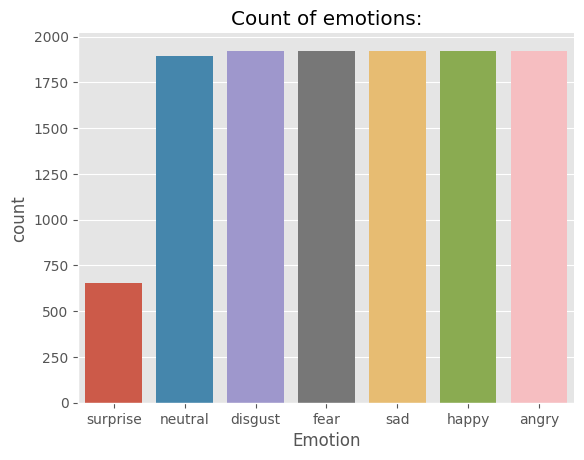

In [13]:
plt.title("Count of emotions:")
sns.countplot(x=df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

##  **Audio Visualization**
To get a sense of what the raw audio looks and sounds like, we define helper functions and visualize example samples.

### **Waveplot and Spectrogram functions** 

In [14]:
def create_waveplot(data, sr, e):
    """
    Plot the waveform of an audio signal.

    Parameters:
    data (numpy.ndarray): Audio time series data.
    sr (int): Sampling rate of the audio data.
    e (str): Label or description of the emotion associated with the audio.

    This function displays the waveform plot of the input audio signal
    with a title indicating the emotion label.
    """
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    # librosa.display.waveplot(data, sr=sr)
    librosa.display.waveshow(data, sr=sr)
    plt.show()




### Purpose of Short-Term Fourier Transform (STFT):

The **Short-Term Fourier Transform (STFT)** is used to analyze how the frequency content of a signal changes over time.

* **Why is this needed?**
  A regular Fourier Transform (FT) gives you the frequency content of the *entire* signal but loses all time information. For many real-world signals like speech, music, or audio emotions, frequency components vary over time — you want to see *when* certain frequencies appear or disappear.

* **How does STFT work?**
  STFT breaks the signal into small overlapping time windows (short segments), and then applies the Fourier Transform to each window separately. This gives a sequence of frequency spectra corresponding to different time intervals.

* **Result:**
  You get a **time-frequency representation** — a spectrogram — that shows how frequencies evolve over time.

In [15]:
def create_spectrogram(data, sr, e):
    """
    Plot the spectrogram of an audio signal using Short-Time Fourier Transform (STFT).

    Parameters:
    data (numpy.ndarray): Audio time series data.
    sr (int): Sampling rate of the audio data.
    e (str): Label or description of the emotion associated with the audio.

    This function computes the STFT of the audio signal,
    converts the amplitude to decibels, and displays a spectrogram
    with time on the x-axis and frequency on the y-axis.
    """
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


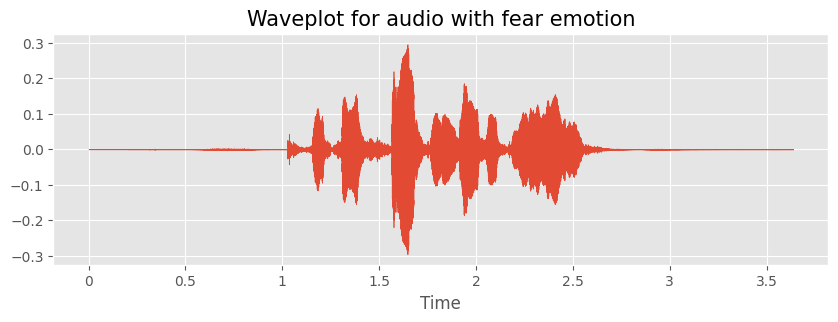

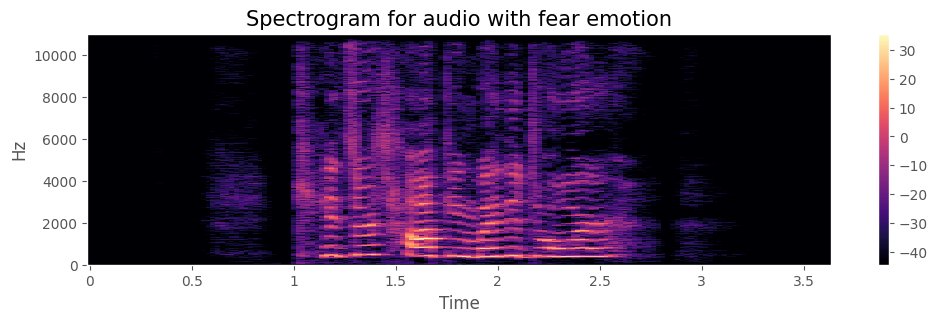

In [16]:
emotion='fear'
path = np.array(df.Path[df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


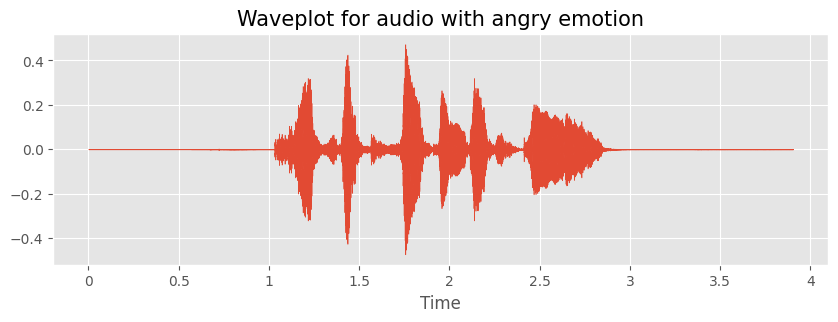

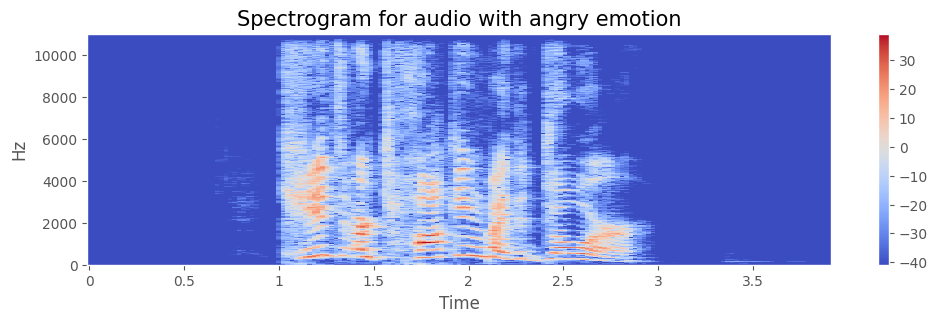

In [17]:
emotion='angry'
path = np.array(df.Path[df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

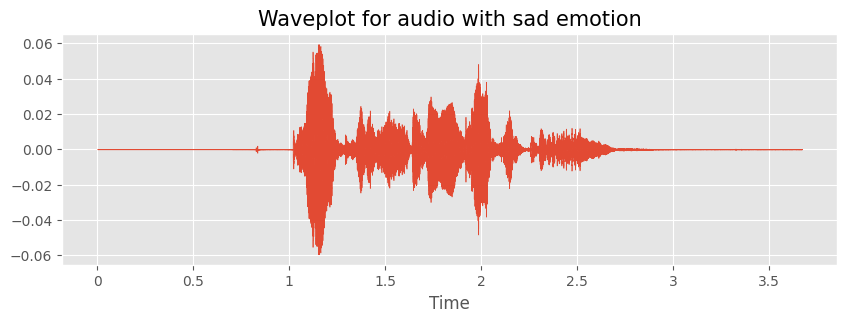

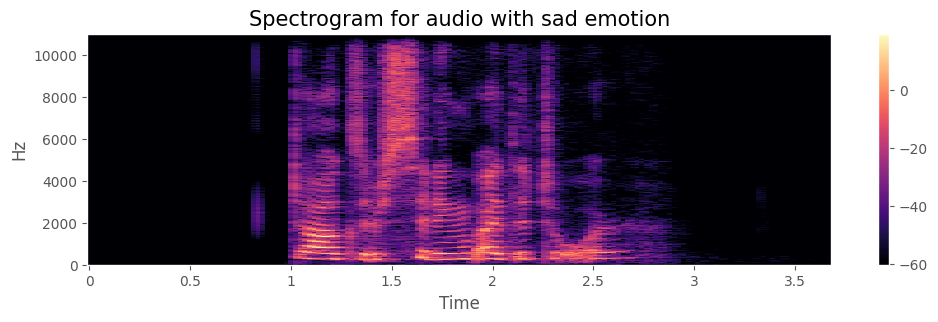

In [18]:
emotion='sad'
path = np.array(df.Path[df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## **Data augmentation**

We have some ways for data augmentation in sound data:

1. Noise injection
2. Stretching
3. Shifting
4. Pitching


### **noise(data, random=False, rate=0.035, threshold=0.075)**

**Purpose:**
Adds artificial noise to the audio data, typically for data augmentation to improve model robustness.

**Explanation:**

* Adds Gaussian noise to the audio signal.
* **Parameters:**

  * `random`: If `True`, a random noise level is chosen up to the given `threshold`.
  * `rate`: If `random=False`, a fixed noise level is applied.
  * `threshold`: Maximum noise level when `random=True`.
* **How it works:**

  * Calculates `noise_amp` as a fraction of the audio’s maximum amplitude.
  * Adds random Gaussian noise scaled by `noise_amp` to the original audio signal.




In [19]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



### **stretch(data, rate=0.8)**

**Purpose:**
Stretches or compresses the audio in time without changing its pitch.

**Explanation:**

* Uses `librosa.effects.time_stretch()` to modify the duration of the audio.
* **Parameters:**

  * `rate`: Stretch factor.

    * A value less than 1 slows down the audio.
    * A value greater than 1 speeds up the audio.

In [20]:
def stretch(data, rate=0.8):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate=rate)



### **shift(data, rate=1000)**

**Purpose:**
Shifts the audio waveform forward or backward in time, used to create variation in timing.

**Explanation:**

* Shifts the waveform by rolling it left or right using `np.roll()`.
* **Parameters:**

  * `rate`: A scaling factor to determine the amount of shift.
* **How it works:**

  * A random shift value is selected in the range `[-5 * rate, 5 * rate]`.
  * The audio data is rolled (circular shift) by this amount.


In [21]:


def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)





### **pitch(data, sampling_rate, pitch_factor=0.7, random=False)**

**Purpose:**
Changes the pitch of the audio without affecting its duration, useful for pitch-based augmentation.

**Explanation:**

* Uses `librosa.effects.pitch_shift()` to alter the pitch.
* **Parameters:**

  * `sampling_rate`: Sampling rate of the audio.
  * `pitch_factor`: Number of semitones to shift the pitch.
  * `random`: If `True`, the pitch shift is chosen randomly up to `pitch_factor`.
* **How it works:**

  * If `random=True`, a random pitch shift is computed.
  * The pitch of the audio is then shifted by the specified number of semitones.



In [22]:
def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    # return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)


In [23]:
df.head()

Emotion                                               Path
0  surprise  ../input/Ravdess/audio_speech_actors_01-24/Act...
1   neutral  ../input/Ravdess/audio_speech_actors_01-24/Act...
2   disgust  ../input/Ravdess/audio_speech_actors_01-24/Act...
3   disgust  ../input/Ravdess/audio_speech_actors_01-24/Act...
4   neutral  ../input/Ravdess/audio_speech_actors_01-24/Act...

In [24]:
path = df[df["Emotion"] == "happy"]["Path"].iloc[0]
data, sampling_rate = librosa.load(path)

### **1. Simple audio**

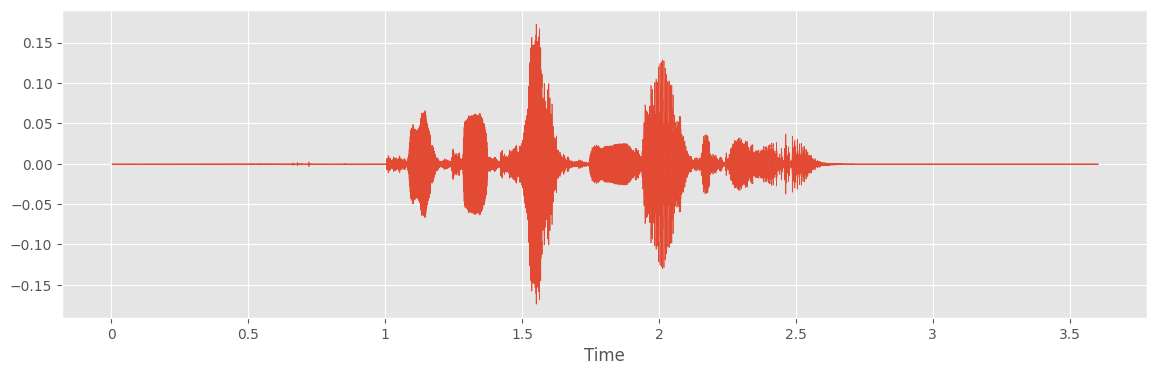

In [25]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(data, sr=sampling_rate)
Audio(path)

### **2. Noised audio**

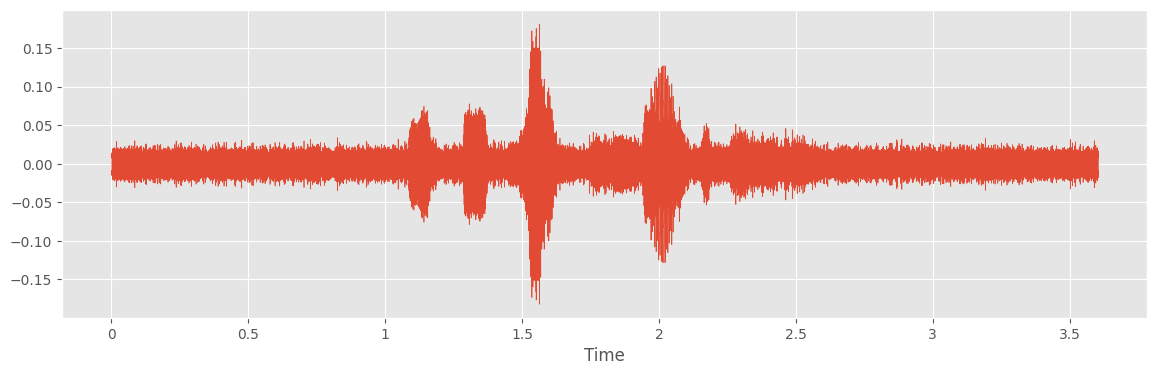

In [26]:
noised_data = noise(data, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=noised_data, sr=sampling_rate)
Audio(noised_data, rate=sampling_rate)


### **3. Stretching**


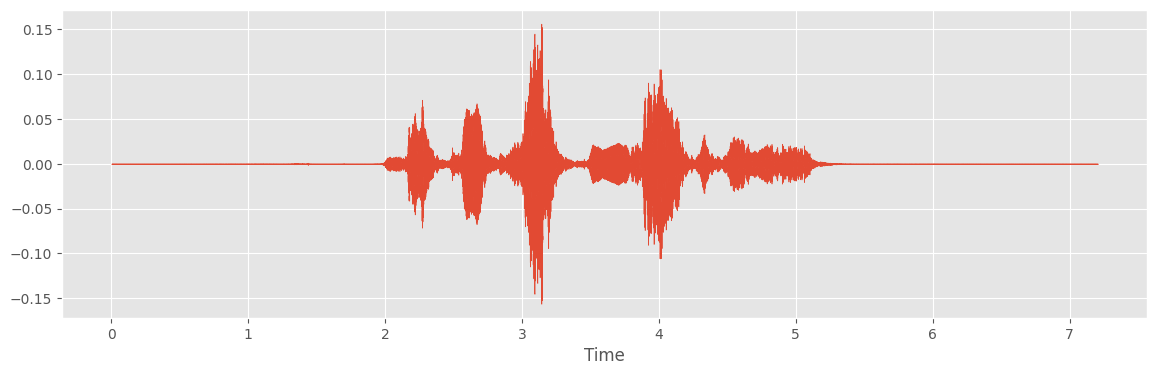

In [27]:
stretched_data = stretch(data, rate=0.5)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=stretched_data, sr=sampling_rate)
Audio(stretched_data, rate=sampling_rate)


### **4. Shifting**


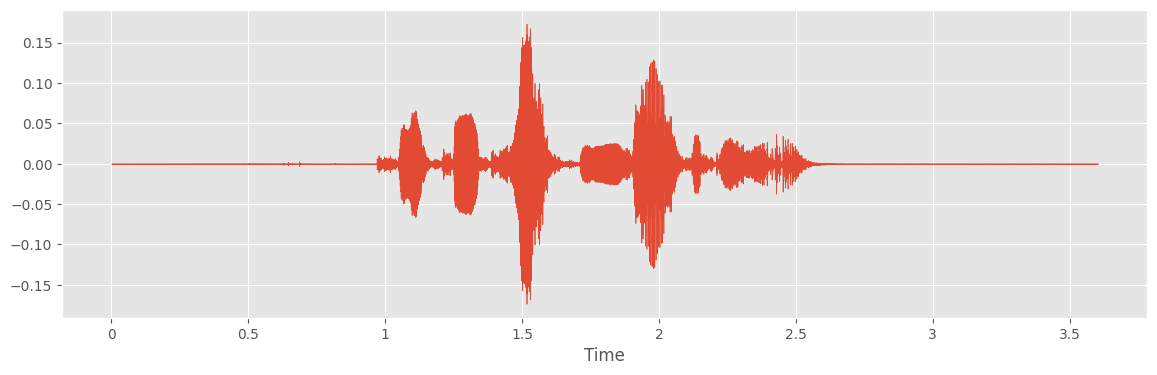

In [28]:
shifted_data = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=shifted_data, sr=sampling_rate)
Audio(shifted_data, rate=sampling_rate)


### **5. Pitching**

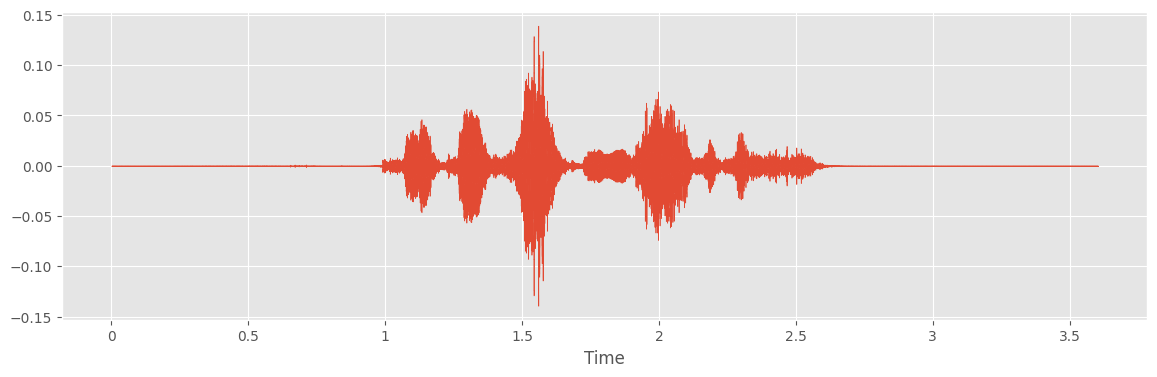

In [29]:
pitched_data = pitch(data, sampling_rate, pitch_factor=0.5, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=pitched_data, sr=sampling_rate)
Audio(pitched_data, rate=sampling_rate)

For our data augmentation we will use noise and pitch and combination with both of it.


## **Feature extraction**

#### There are some features may be useful:


### Audio Features for Signal Processing

1. **Zero Crossing Rate**
   The rate at which the signal changes sign (i.e., crosses the zero axis) within a given frame. It is often used to characterize noisiness or percussive elements in audio.

2. **Energy**
   The total signal energy, calculated as the sum of squared signal values, normalized by the frame length. This feature indicates signal intensity or loudness.

3. **Entropy of Energy**
   A measure of the unpredictability or abruptness in energy across sub-frames. High entropy typically indicates more transient or irregular sound patterns.

4. **Spectral Centroid**
   Represents the "center of mass" of the spectrum. It is a perceptual measure that indicates where the bulk of the spectral energy is located (e.g., low vs. high frequencies).

5. **Spectral Spread**
   The second central moment of the spectrum. It describes the dispersion or variance around the spectral centroid, helping distinguish between narrow-band and broad-band signals.

6. **Spectral Entropy**
   The entropy (or complexity) of the normalized spectral energy distribution across sub-frames. It quantifies how flat or peaky the spectrum is.

7. **Spectral Flux**
   Measures the rate of change in the power spectrum between consecutive frames. It captures how quickly the frequency content evolves over time.

8. **Spectral Rolloff**
   The frequency below which a certain percentage (commonly 85% or 90%) of the total spectral energy is contained. It is used to distinguish between harmonic and noisy signals.

9. **MFCCs (Mel-Frequency Cepstral Coefficients)**
   A set of coefficients that represent the short-term power spectrum of a sound. MFCCs are computed using a Mel-scale, which mimics the human ear’s perception of sound, making them highly useful in speech and emotion recognition tasks.


**Frame Length:** Determines the number of audio samples used in each analysis window (i.e., how much of the signal is processed at once).

**Hop Length:** Specifies the number of samples to move forward for the next frame, controlling the overlap between consecutive frames.

In [30]:
n_fft = 2048 # frame length
hop_length = 512 # hop length

In [31]:
def chunks(data, frame_length, hop_length):
    """
    Generator function that yields overlapping chunks of the input data.
    Each chunk has length 'frame_length' and is shifted by 'hop_length'.

    Parameters:
        data (np.ndarray): Audio signal.
        frame_length (int): Length of each frame.
        hop_length (int): Step size between frames.

    Yields:
        np.ndarray: Audio segment of length 'frame_length'.
    """
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]


In [32]:
def zcr(data, frame_length=2048, hop_length=512):
    """
    Compute the Zero Crossing Rate (ZCR) of the audio signal.

    ZCR measures the rate at which the signal changes sign. 
    It is useful for identifying noisy or percussive components in the audio.

    Returns:
        np.ndarray: Array of ZCR values for each frame.
    """
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


In [33]:
def energy(data, frame_length=2048, hop_length=512):
    """
    Compute the signal energy over time using a sliding window.

    Energy is calculated as the sum of squared amplitudes within each frame.

    Returns:
        np.ndarray: Energy values per frame.
    """
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length


In [34]:
def rmse(data, frame_length=2048, hop_length=512):
    """
    Compute the Root Mean Square Energy (RMSE) of the signal.

    RMSE is an alternative to basic energy that gives a better representation
    of signal intensity.

    Returns:
        np.ndarray: RMSE values for each frame.
    """
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


In [35]:
def entropy_of_energy(data, frame_length=2048, hop_length=512):
    """
    Compute the entropy of energy distribution across frames.

    Higher entropy indicates more variation or abrupt changes in energy.

    Returns:
        np.ndarray: Entropy values of energy for each frame.
    """
    energies = energy(data, frame_length, hop_length)
    energies /= np.sum(energies)

    entropy = 0.0
    entropy -= energies * np.log2(energies)
    return entropy


In [36]:
def spc(data, sr, frame_length=2048, hop_length=512):
    """
    Compute the Spectral Centroid of the signal.

    The spectral centroid is the "center of mass" of the spectrum,
    representing the brightness of the sound.

    Returns:
        np.ndarray: Spectral centroid values per frame.
    """
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spectral_centroid)


In [37]:
def spc_flux(data):
    """
    Compute the Spectral Flux of a signal or spectrum.

    Spectral flux measures the change in spectral magnitude between 
    consecutive frames, capturing dynamics in frequency content.

    Returns:
        np.ndarray: Spectral flux values.
    """
    isSpectrum = data.ndim == 1
    if isSpectrum:
        data = np.expand_dims(data, axis=1)

    X = np.c_[data[:, 0], data]
    af_Delta_X = np.diff(X, 1, axis=1)
    vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

    return np.squeeze(vsf) if isSpectrum else vsf


In [38]:
def spc_rollof(data, sr, frame_length=2048, hop_length=512):
    """
    Compute the Spectral Rolloff of the signal.

    Spectral rolloff is the frequency below which a specified percentage
    (typically 85% or 90%) of the total spectral energy is contained.

    Returns:
        np.ndarray: Spectral rolloff values per frame.
    """
    spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spcrollof)


In [39]:
def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    """
    Compute the Chroma Short-Time Fourier Transform.

    This captures the intensity of each of the 12 distinct semitones (pitches) 
    of the musical octave, useful for harmony and chord recognition.

    Parameters:
        flatten (bool): Whether to flatten the output to a 1D array.

    Returns:
        np.ndarray: Chroma features per frame (or flattened).
    """
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


In [40]:
def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    """
    Compute the Mel Spectrogram of the audio signal.

    A mel spectrogram represents the short-term power spectrum of sound 
    using the mel scale, which approximates human auditory perception.

    Parameters:
        flatten (bool): Whether to flatten the output to a 1D array.

    Returns:
        np.ndarray: Mel spectrogram (or flattened version).
    """
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)


In [41]:
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    """
    Compute the Mel-Frequency Cepstral Coefficients (MFCCs).

    MFCCs are widely used audio features that represent the short-term 
    power spectrum of a sound using the mel frequency scale and cepstral analysis.

    Parameters:
        flatten (bool): Whether to flatten the output to a 1D array.

    Returns:
        np.ndarray: MFCC feature array (or flattened).
    """
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)


In [42]:
# def chunks(data, frame_length, hop_length):
#     for i in range(0, len(data), hop_length):
#         yield data[i:i+frame_length]

# # Zero Crossing Rate
# def zcr(data, frame_length=2048, hop_length=512):
#     zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
#     return np.squeeze(zcr)


# def energy(data, frame_length=2048, hop_length=512):
#     en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
#     return en / frame_length


# def rmse(data, frame_length=2048, hop_length=512):
#     rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
#     return np.squeeze(rmse)


# def entropy_of_energy(data, frame_length=2048, hop_length=512):
#     energies = energy(data, frame_length, hop_length)
#     energies /= np.sum(energies)

#     entropy = 0.0
#     entropy -= energies * np.log2(energies)
#     return entropy


# def spc(data, sr, frame_length=2048, hop_length=512):
#     spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
#     return np.squeeze(spectral_centroid)


# # def spc_entropy(data, sr):
# #     spc_en = spectral_entropy(data, sf=sr, method="fft")
# #     return spc_en

# def spc_flux(data):
#     isSpectrum = data.ndim == 1
#     if isSpectrum:
#         data = np.expand_dims(data, axis=1)

#     X = np.c_[data[:, 0], data]
#     af_Delta_X = np.diff(X, 1, axis=1)
#     vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

#     return np.squeeze(vsf) if isSpectrum else vsf


# def spc_rollof(data, sr, frame_length=2048, hop_length=512):
#     spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
#     return np.squeeze(spcrollof)


# def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
#     stft = np.abs(librosa.stft(data))
#     chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
#     return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


# def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
#     mel = librosa.feature.melspectrogram(y=data, sr=sr)
#     return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

# def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
#     mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
#     return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

#### Let's check data formats:

In [43]:
path = np.array(df["Path"])[658]
data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
len(data)

55125

In [44]:
print("ZCR: ", zcr(data).shape)
print("Energy: ", energy(data).shape)
print("Entropy of Energy :", entropy_of_energy(data).shape)
print("RMS :", rmse(data).shape)
print("Spectral Centroid :", spc(data, sampling_rate).shape)
# print("Spectral Entropy: ", spc_entropy(data, sampling_rate).shape)
print("Spectral Flux: ", spc_flux(data).shape)
print("Spectral Rollof: ", spc_rollof(data, sampling_rate).shape)
print("Chroma STFT: ", chroma_stft(data, sampling_rate).shape)
print("MelSpectrogram: ", mel_spc(data, sampling_rate).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)


ZCR:  (108,)
Energy:  (108,)
Entropy of Energy : (108,)
RMS : (108,)
Spectral Centroid : (108,)
Spectral Flux:  ()
Spectral Rollof:  (108,)
Chroma STFT:  (1296,)
MelSpectrogram:  (13824,)
MFCC:  (2160,)


Output Explanation

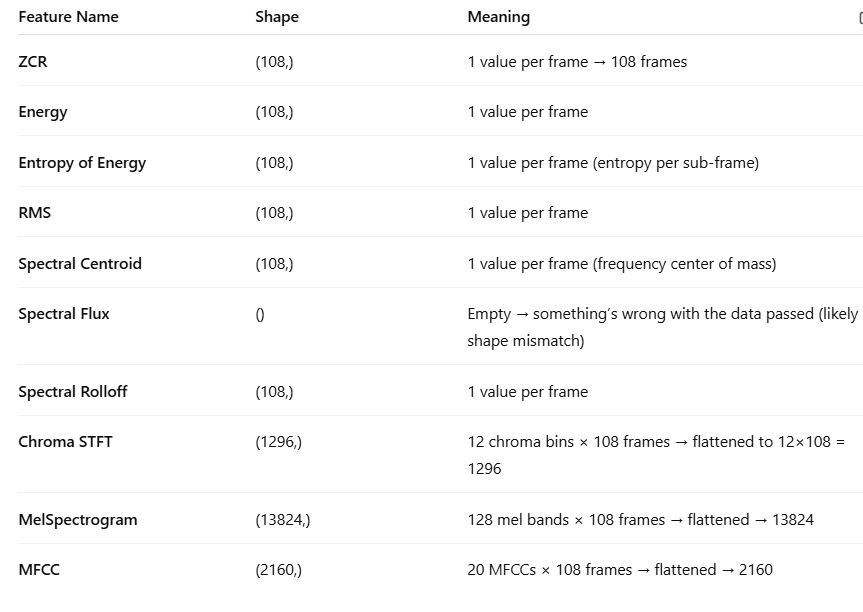



### **Reasons for Selecting ZCR, RMS, and MFCC**

1. **Complementary Information:**

   * **ZCR** captures temporal structure (voicing).
   * **RMS** captures energy or loudness.
   * **MFCC** captures spectral and phonetic content.

2. **Redundancy Avoidance:**

   * Other features like Energy, Spectral Centroid, etc., provide similar information already covered by RMS or MFCC.

3. **Computational Efficiency:**

   * Fewer features mean faster feature extraction and model training.

4. **Better Generalization:**

   * Simplifying the feature set helps avoid overfitting, especially with limited data.

5. **Empirical Validation:**

   * Experimental results showed that adding more features did not significantly improve performance.

6. **Interpretability:**

   * These features are well-understood and widely used in speech processing, making them easier to analyze and debug.


In experimental way was decided to use just 3 main features for this task: *ZCR*, *RMS* and *MFCC*.

Also in experimental way  was decided to use just 2.5s duration with 0.6 offset - in the dataset first 0.6s contains
no information about emotion, and most of them are less then 3s.

In [45]:


def extract_features(data, sr, frame_length=2048, hop_length=512):
    """
    Extracts selected audio features from the given sound data.

    Parameters:
    -----------
    data : np.ndarray
        The audio time series signal.
    sr : int
        Sampling rate of the audio signal.
    frame_length : int, optional (default=2048)
        The number of samples per analysis frame (window size).
    hop_length : int, optional (default=512)
        The number of samples between successive frames.

    Returns:
    --------
    result : np.ndarray
        A 1D feature vector containing the concatenated features:
            - Zero Crossing Rate (ZCR): Measures the rate at which the signal changes sign.
            - Root Mean Square Energy (RMS): Represents the power or loudness of the signal.
            - Mel-Frequency Cepstral Coefficients (MFCC): Captures the timbral and spectral characteristics of the signal using the mel scale.

    """
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        # np.mean(energy(data, frame_length, hop_length),axis=0),
                        # np.mean(entropy_of_energy(data, frame_length, hop_length), axis=0),
                        rmse(data, frame_length, hop_length),
                        # spc(data, sr, frame_length, hop_length),
                        # spc_entropy(data, sr),
                        # spc_flux(data),
                        # spc_rollof(data, sr, frame_length, hop_length),
                        # chroma_stft(data, sr, frame_length, hop_length),
                        # mel_spc(data, sr, frame_length, hop_length, flatten=True)
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result


In [46]:
def get_features(path, duration=2.5, offset=0.6):
    """
    Extracts augmented feature sets from an audio file for robust training.

    Parameters:
    -----------
    path : str
        File path to the audio signal.
    duration : float, optional (default=2.5)
        Duration (in seconds) of audio to load from the file.
        Helps in standardizing feature extraction by limiting the input length.
    offset : float, optional (default=0.6)
        Time offset (in seconds) from where to start reading the audio.
        Skips silent or irrelevant portions usually present at the beginning of speech.

    Returns:
    --------
    result : np.ndarray
        A 2D array where each row is a feature vector extracted from:
            - Original audio
            - Noisy audio
            - Pitched audio
            - Audio with both noise and pitch shift

    Workflow:
    ---------
    1. Load audio with specified duration and offset.
    2. Extract features from the original audio.
    3. Augment the data by:
        - Adding noise
        - Pitch shifting
        - Applying both noise and pitch shift
    4. Extract features from each augmented version.
    5. Stack all feature vectors vertically to return as a single array.

    Purpose:
    --------
    This function is designed to increase the diversity and robustness of the feature dataset using basic audio augmentations,
    improving generalization during model training (especially for speech-related tasks like emotion or speaker recognition).
    """
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))  # stacking vertically

    # data with pitching
    pitched_data = pitch(data, sample_rate, random=True)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3))  # stacking vertically

    # data with pitching and white_noise
    new_data = pitch(data, sample_rate, random=True)
    data_noise_pitch = noise(new_data, random=True)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3))  # stacking vertically

    return result


In [47]:
# def get_features(path, duration=2.5, offset=0.6):
#     # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
#     data, sample_rate = librosa.load(path, duration=duration, offset=offset)

#      # without augmentation
#     res1 = extract_features(data, sample_rate)
#     result = np.array(res1)

#     # data with noise
#     noise_data = noise(data, random=True)
#     res2 = extract_features(noise_data, sample_rate)
#     result = np.vstack((result, res2)) # stacking vertically

#     # data with pitching
#     pitched_data = pitch(data, sample_rate, random=True)
#     res3 = extract_features(pitched_data, sample_rate)
#     result = np.vstack((result, res3)) # stacking vertically

#     # data with pitching and white_noise
#     new_data = pitch(data, sample_rate, random=True)
#     data_noise_pitch = noise(new_data, random=True)
#     res3 = extract_features(data_noise_pitch, sample_rate)
#     result = np.vstack((result, res3)) # stacking vertically

#     return result


### **Building the feature dataset**
This cell loops over every audio file in our combined DataFrame df and constructs the feature matrix X and label list Y:

Initialize empty lists X (features) and Y (labels).

For each (path, emotion) in df (with an index ind for progress):

Call get_features(path) to get 4 feature vectors due to augmentation.

For each feature vector ele in the result, append it to X and append the emotion label to Y. Since we created 4 versions per file, each emotion is appended 4 times (once per augmentation).

Print a status every 100 files processed.

After the loop, X is a list of numpy arrays (each feature vector) and Y is a list of corresponding labels.

In [ ]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(df.Path, df.Emotion, range(df.Path.shape[0])):
    features = get_features(path)
    if ind % 100 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print("Done.")

Feature processing...
0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...
500 samples has been processed...


Let's save our features as DataFrame for further processing:

In [ ]:
features_path = "./features.csv"

In [ ]:
extracted_df = pd.DataFrame(X)
extracted_df["labels"] = Y
extracted_df.to_csv(features_path, index=False)
extracted_df.head()

In [ ]:
extracted_df = pd.read_csv(features_path)
print(extracted_df.shape)

In [ ]:
# Fill NaN with 0
extracted_df = extracted_df.fillna(0)
print(extracted_df.isna().any())
extracted_df.shape


In [ ]:
extracted_df.head()

## **Data preparation**

As of now we have extracted the data, now we need to normalize and split our data for training and testing.


In [ ]:
X = extracted_df.drop(labels="labels", axis=1)
Y = extracted_df["labels"]

### **Encoding labels**
Before training a model, we need numeric labels. We use LabelEncoder to map each emotion string to an integer, then convert to a one-hot vector for multi-class classification:

Create a LabelEncoder instance lb.

Call lb.fit_transform(Y) to convert string labels to integers (0 through 6 for 7 emotions).

Use np_utils.to_categorical(...) to convert integer labels into one-hot encoded vectors Y.

Print lb.classes_ to see the order of classes (this shows ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']).

Y becomes a 2D array of shape (num_samples, num_classes).

In [ ]:
lb = LabelEncoder()
# Y = np_utils.to_categorical(lb.fit_transform(Y))
Y = to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y


### **Splitting data into train/validation/test**
We now split the feature data X (an array) and labels Y into training, validation, and test sets:

**Train/Test split:** Use train_test_split with test_size=0.2 and random_state=42. This reserves 20% of the data for testing, 80% for training.

**Train/Validation split:** Further split the original training set into a smaller training set and a validation set (10% of the original training goes to validation). We use test_size=0.1 on the 80% training partition.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

### **Feature scaling**
Neural networks often work better when input features are scaled. We apply StandardScaler to normalize features to zero mean and unit variance based on the training data:

Fit StandardScaler on X_train.

Transform X_train, X_test, and X_val using this scaler (so that test/val use the same scaling).


In [ ]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

In [ ]:
# We have to use 1-dimensional CNN which need specifical shape:
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

In [76]:
from IPython.display import FileLink
FileLink('./features.csv')
## download problem solving

## **Defining Model:**

Here we define a 1D convolutional neural network (CNN) using Keras Sequential. This model will learn to classify the emotion from the extracted features:

**Convolutional layers:** Several Conv1D layers with ReLU activation and batch normalization, each followed by max pooling. The idea is to detect patterns in the 1D feature sequence.

**Flatten and Dense:** After the convolutional blocks, we flatten and add a Dense layer with 512 units (ReLU), batch norm, and then the final Dense layer with 7 units (softmax) for the 7 emotion classes.

The first Conv1D layer specifies input_shape=(X_train.shape[1], 1), meaning we treat each feature vector of length 2376 as a sequence with 1 channel. We will reshape X_train accordingly before training.

**Compile:** We compile the model with the Adam optimizer (RMSprop in code), categorical cross-entropy loss (since this is multi-class classification), and metrics for accuracy and F1-score (f1_m custom metric defined earlier).

#### **EarlyStopping**

Prevents overfitting by stopping training when validation accuracy (val_acc) stops improving.

patience=5: Waits for 5 epochs of no improvement before stopping, giving the model a chance to recover.

restore_best_weights=True: Ensures that the best-performing weights (with the highest val_acc) are restored after stopping.

In [99]:
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)


#### **ReduceLROnPlateau**

Dynamically reduces the learning rate when the model stops improving (val_acc plateaus).

patience=3: If no improvement in val_acc for 3 epochs, reduce learning rate.

factor=0.5: Reduce the current learning rate by half.

min_lr=0.00001: Prevents the learning rate from going too low and making training ineffective.

In [100]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [80]:

from keras import backend as K

def recall_m(y_true, y_pred):
    """
    Computes the Recall metric for binary or multi-label classification.
    
    Recall (also known as Sensitivity or True Positive Rate) measures the proportion of actual positives 
    that are correctly identified by the model.

    Formula:
        Recall = True Positives / (True Positives + False Negatives)

    Parameters:
        y_true: Tensor of true labels
        y_pred: Tensor of predicted labels

    Returns:
        recall: A scalar tensor representing the recall score
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [81]:
def precision_m(y_true, y_pred):
    """
    Computes the Precision metric for binary or multi-label classification.
    
    Precision measures the proportion of predicted positives that are actually correct.

    Formula:
        Precision = True Positives / (True Positives + False Positives)

    Parameters:
        y_true: Tensor of true labels
        y_pred: Tensor of predicted labels

    Returns:
        precision: A scalar tensor representing the precision score
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


In [83]:
def f1_m(y_true, y_pred):
    """
    Computes the F1 Score, which is the harmonic mean of Precision and Recall.

    The F1 Score balances the trade-off between precision and recall, especially useful
    when there is class imbalance in the data.

    Formula:
        F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

    Parameters:
        y_true: Tensor of true labels
        y_pred: Tensor of predicted labels

    Returns:
        f1_score: A scalar tensor representing the F1 score
    """
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [85]:
# from keras import backend as K

# def recall_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_m(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))


# model = models.Sequential()
# model.add(layers.Conv1D(512, kernel_size=5, strides=1,
#                         padding="same", activation="relu",
#                         input_shape=(X_train.shape[1], 1)))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

# model.add(layers.Conv1D(512, kernel_size=5, strides=1,
#                         padding="same", activation="relu"))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

# model.add(layers.Conv1D(256, kernel_size=5, strides=1,
#                         padding="same", activation="relu"))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

# model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

# model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(7, activation="softmax"))

# model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc", f1_m])

In [120]:


# Define a Sequential model for 1D audio feature input
model = models.Sequential()

# First convolutional block
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))  # Input layer, expects shape (timesteps, 1)
model.add(layers.BatchNormalization())  # Normalize activations to help with faster convergence
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))  # Downsample feature maps

# Second convolutional block
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

# Third convolutional block
model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

# Fourth convolutional block with smaller kernel
model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Fifth convolutional block with reduced number of filters
model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides=2, padding='same'))

# Flatten the feature maps to feed into fully connected layers
model.add(layers.Flatten())

# Fully connected (Dense) layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())  # Normalize activations again

# Output layer: 7 classes with softmax for multi-class classification
model.add(layers.Dense(7, activation="softmax"))

# Compile the model




In [121]:
from tensorflow.keras.optimizers import RMSprop


optimizer = RMSprop(learning_rate=0.001)
optimizer.lr = optimizer.learning_rate  # Patch

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 2376, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 2376, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 1188, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 1188, 512)           │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 1188, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 594, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 594, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 297, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 297, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 297, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 149, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 149, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,915,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,193,223 (27.44 MB)

 Trainable params: 7,188,871 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [123]:
EPOCHS = 50
batch_size = 64

In [114]:
# print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)


In [115]:
# from tensorflow.keras import backend as K
# K.clear_session()


In [116]:
# import tensorflow as tf
# print(tf.__version__)


In [117]:
# print(y_train[:5])  # should look like [[0,0,1,0,0,0,0], ...]


In [124]:
from tensorflow.keras import backend as K

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=EPOCHS,
                    batch_size=batch_size,
                    callbacks=[earlystopping, learning_rate_reduction])


Epoch 1/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.3792 - loss: 1.8300 - val_accuracy: 0.4884 - val_loss: 1.3539 - lr: 0.0010
Epoch 2/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 71s 130ms/step - accuracy: 0.5622 - loss: 1.1123 - val_accuracy: 0.5082 - val_loss: 1.3354 - lr: 0.0010
Epoch 3/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 71s 130ms/step - accuracy: 0.6258 - loss: 0.9701 - val_accuracy: 0.5370 - val_loss: 1.2656 - lr: 0.0010
Epoch 4/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 71s 130ms/step - accuracy: 0.6818 - loss: 0.8308 - val_accuracy: 0.6359 - val_loss: 1.0099 - lr: 0.0010
Epoch 5/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 71s 130ms/step - accuracy: 0.7405 - loss: 0.6921 - val_accuracy: 0.6737 - val_loss: 0.8998 - lr: 0.0010
Epoch 6/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 71s 130ms/step - accuracy: 0.7980 - loss: 0.5483 - val_accuracy: 0.6981 - val_loss: 0.8345 - lr: 0.0010
Epoch 7/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 71s 130ms/step - accuracy: 0.8572 - loss: 0.4042 - val_accuracy: 0.7012 - val_loss: 0.9053 - lr:

## **Evaluation**
After training, we evaluate the model on the held-out test set.


### **Predictions**
We use model.predict(X_test) to get the predicted probabilities for each class on the test features.

Take np.argmax across classes to get the predicted class index for each sample (y_pred).

**Compare this to the true labels:** first we convert y_test (which is one-hot) back to class indices with np.argmax(y_test, axis=1) to get y_check.


305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9557 - loss: 0.2376
Accuracy of our model on test data :  95.8684504032135 %


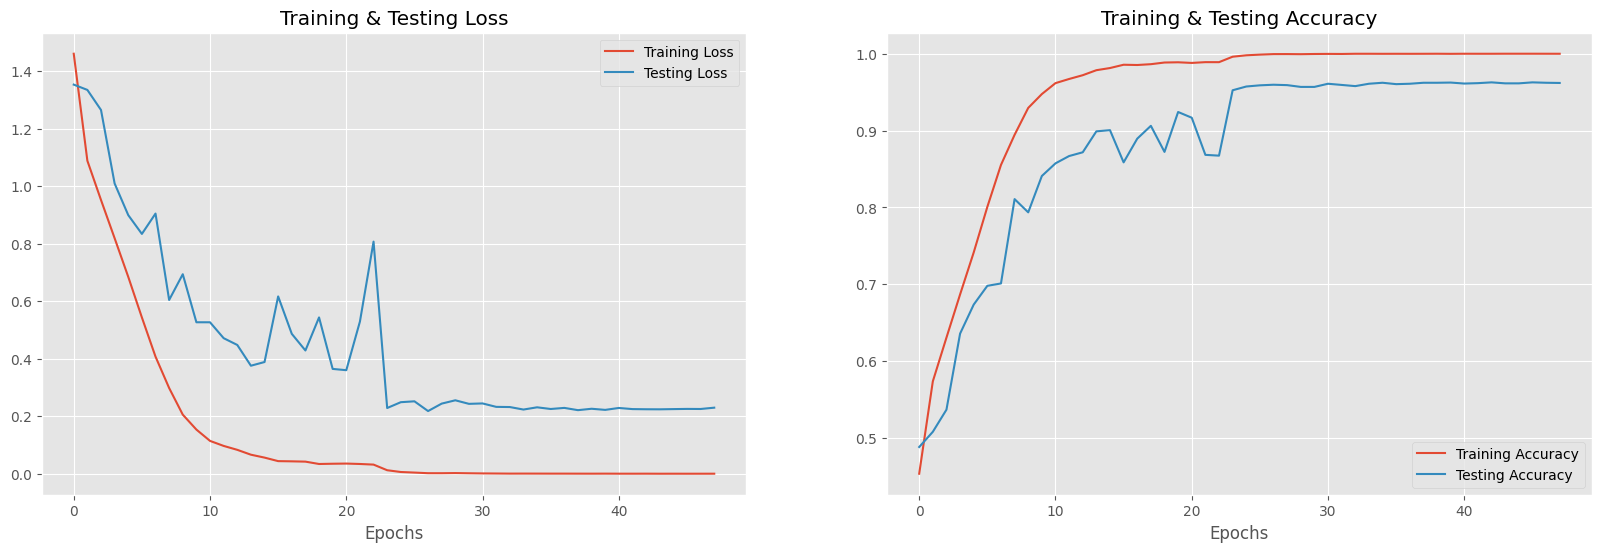

In [126]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [127]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

305/305 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


array([5, 0, 1, ..., 4, 5, 2])

In [128]:
y_check = np.argmax(y_test, axis=1)
y_check

array([0, 0, 1, ..., 4, 5, 2])

### **Confusion matrix**
We compute and plot a confusion matrix to analyze performance by class:

Import confusion_matrix from scikit-learn.

Compute cm = confusion_matrix(y_true=y_check, y_pred=y_pred).

Define a plotting function plot_confusion_matrix which:

Displays the matrix as an image with a color bar.

Labels axes with emotion names.

Normalizes values.

Annotates counts in each cell.

Then call plot_confusion_matrix(cm, classes=..., title='Confusion Matrix') with our class names.

In [129]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

In [132]:
# def plot_confusion_matrix(cm, classes,
#                         normalize=False,
#                         title='Confusion matrix',
#                         cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#             horizontalalignment="center",
#             color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [133]:
# cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
# plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Normalized confusion matrix
[[9.69676550e-01 6.73854447e-03 8.08625337e-03 8.76010782e-03
  4.04312668e-03 6.73854447e-04 2.02156334e-03]
 [1.28369705e-02 9.51219512e-01 2.56739409e-03 7.70218228e-03
  1.09114249e-02 1.41206675e-02 6.41848524e-04]
 [1.59468439e-02 5.31561462e-03 9.52159468e-01 6.64451827e-03
  5.31561462e-03 1.19601329e-02 2.65780731e-03]
 [1.42063002e-02 1.23533045e-02 1.54416306e-02 9.45027795e-01
  8.02964793e-03 1.23533045e-03 3.70599135e-03]
 [5.13478819e-03 1.21951220e-02 3.85109114e-03 7.06033376e-03
  9.61489089e-01 9.62772786e-03 6.41848524e-04]
 [2.02976996e-03 1.01488498e-02 5.41271989e-03 1.35317997e-03
  1.08254398e-02 9.70230041e-01 0.00000000e+00]
 [5.68181818e-03 1.89393939e-03 7.57575758e-03 1.32575758e-02
  1.89393939e-03 0.00000000e+00 9.69696970e-01]]


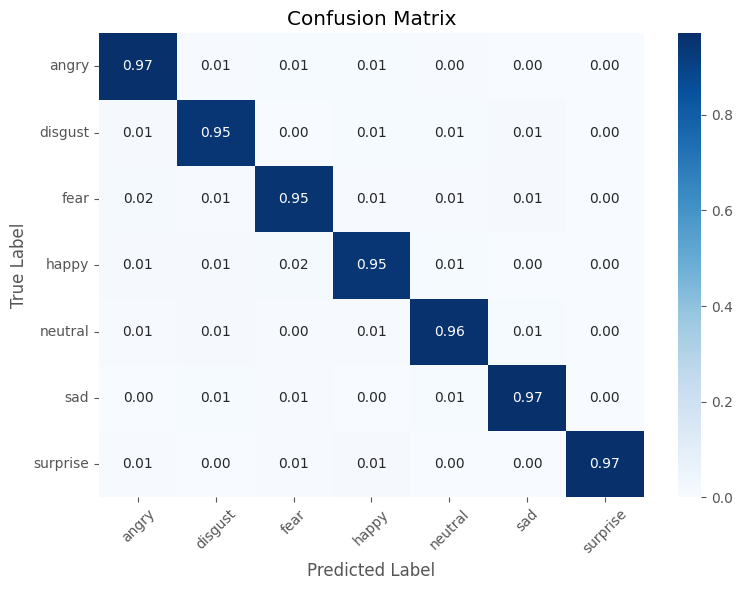

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, class_names, normalize=False, title='Confusion Matrix', figsize=(8, 6)):
    """
    Plots a confusion matrix using seaborn heatmap.
    
    Parameters:
    - cm: Confusion matrix (2D array)
    - class_names: List of class labels
    - normalize: If True, normalize the matrix row-wise
    - title: Title of the plot
    - figsize: Tuple to define figure size
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = ".2f"
        print("Normalized confusion matrix")
    else:
        fmt = "d"
        print("Confusion matrix, without normalization")
        
    print(cm)

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `y_true` and `y_pred` are your ground truth and model predictions
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_true, y_pred)

cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_confusion_matrix(cm=cm, class_names=cm_plot_labels, normalize=True)


## **Saving The Model**

In [130]:
path_to_model = "./final_model.h5"

model.save(path_to_model)

In [134]:
from IPython.display import FileLink
FileLink('./final_model.h5')
## download problem solving

/kaggle/working/final_model.h5